#**Problem Statement**

The Fraud Detection Problem includes modeling past data with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether the new applicant is fraudulent or not.

#**Import Basic Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the CSV file**

In [2]:
df = pd.read_csv("fraud_dataset.csv")

# **Analysing the Data**

In [4]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0


In [3]:
df.shape

(827, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    827 non-null    int64
 1   Married                   827 non-null    int64
 2   Dependents                827 non-null    int64
 3   Education                 827 non-null    int64
 4   Self_Employed             827 non-null    int64
 5   ApplicantIncome           827 non-null    int64
 6   CoapplicantIncome         827 non-null    int64
 7   LoanAmount                827 non-null    int64
 8   Loan_Term                 827 non-null    int64
 9   Credit_History_Available  827 non-null    int64
 10  Housing                   827 non-null    int64
 11  Locality                  827 non-null    int64
 12  Fraud_Risk                827 non-null    int64
dtypes: int64(13)
memory usage: 84.1 KB


In [5]:
count_fraud = len(df[df['Fraud_Risk']==0])
count_non_fraud = len(df[df['Fraud_Risk']==1])
non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk =", round(non_fraud*100,2))
fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk =", round(fraud*100,2))

percentage of non Fraud Risk = 57.68
percentage of Fraud Risk = 42.32


# **Data Cleaning & Missing value Treatment**

In [6]:
df.isna().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

No data cleaning and missing value treatment needed as data is already in a clean form.

# **Exploratory Data Analysis**

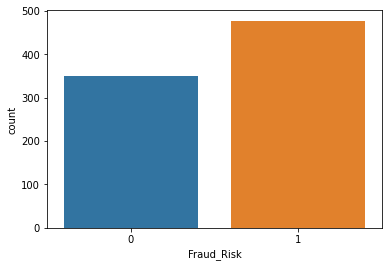

In [7]:
sns.countplot(x='Fraud_Risk',data=df)
plt.show()

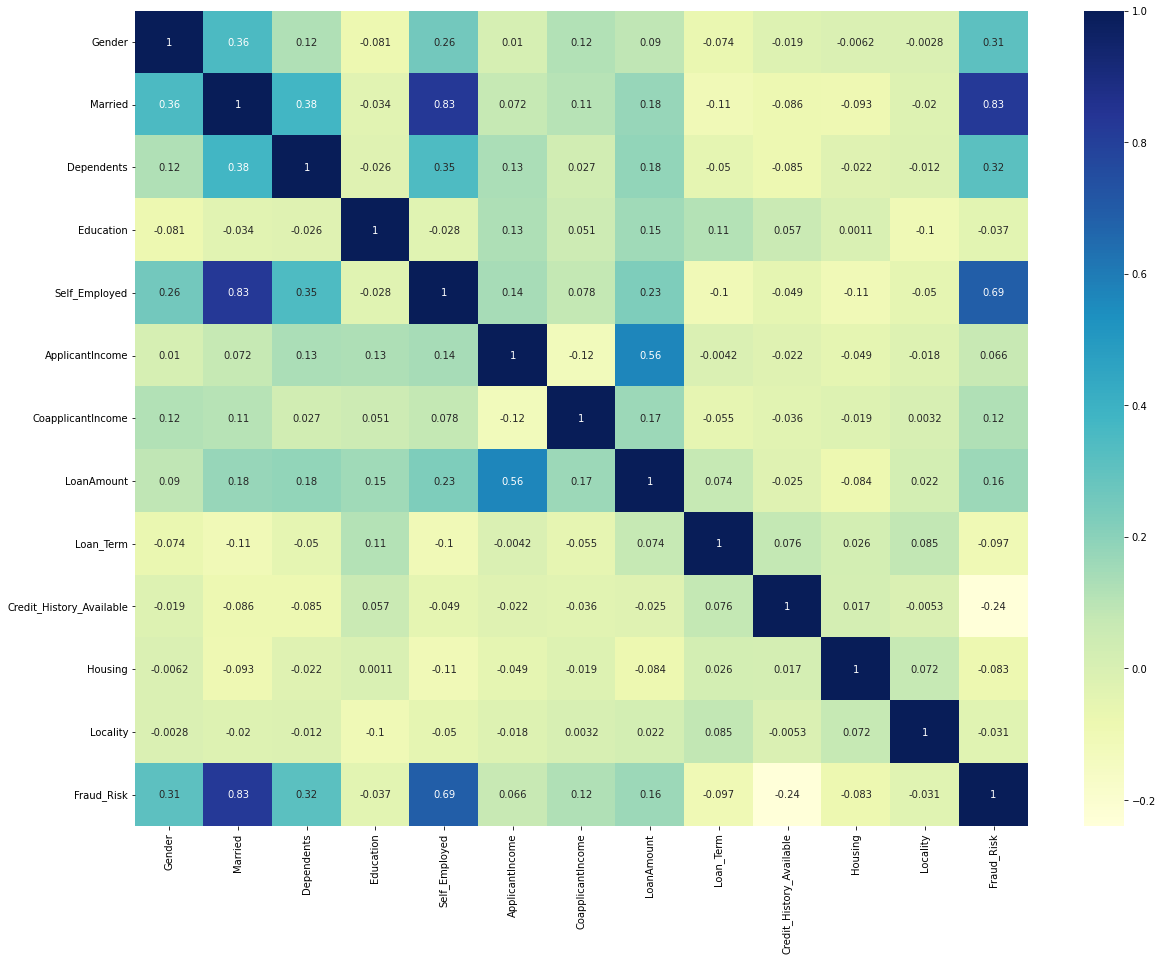

In [8]:
corr=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="YlGnBu")

In [9]:
cor= corr['Fraud_Risk']
cor

Gender                      0.309570
Married                     0.825064
Dependents                  0.315421
Education                  -0.037406
Self_Employed               0.688170
ApplicantIncome             0.066347
CoapplicantIncome           0.120304
LoanAmount                  0.164087
Loan_Term                  -0.097339
Credit_History_Available   -0.239512
Housing                    -0.082534
Locality                   -0.030530
Fraud_Risk                  1.000000
Name: Fraud_Risk, dtype: float64

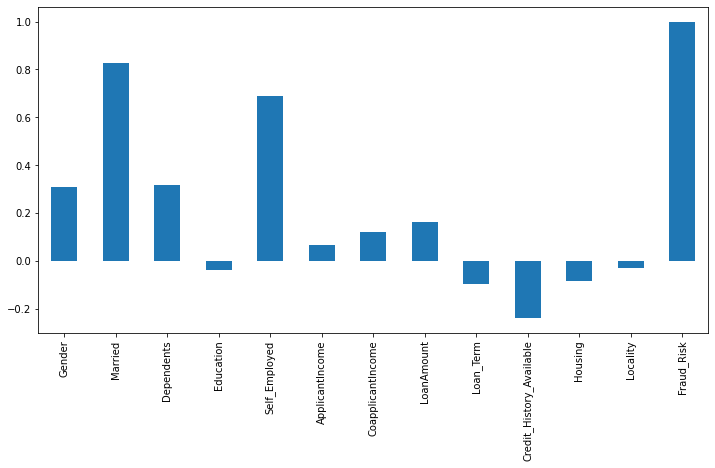

In [10]:
plt.figure(figsize=(12,6))
cor.plot(kind="bar")
plt.show()

**Observation**
There is a strong positive correlation between 'Married' & 'Self_Employed' with our target variable 'Fraud_Risk'


In [11]:
col= df.columns
col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term',
       'Credit_History_Available', 'Housing', 'Locality', 'Fraud_Risk'],
      dtype='object')

******* ApplicantIncome *******


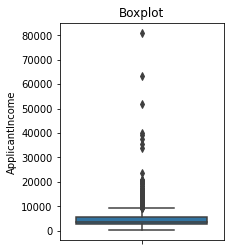

******* CoapplicantIncome *******


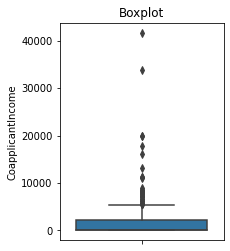

******* LoanAmount *******


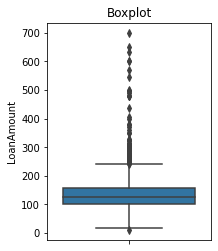

******* Loan_Term *******


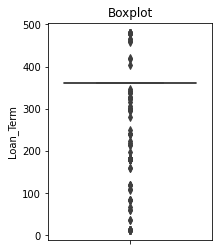

In [12]:
col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term']
for var in col:
  print("******* {} *******".format(var))
  plt.figure(figsize=(10, 4))
  plt.subplot(1, 3, 3)
  sns.boxplot(y= df[var])
  plt.title('Boxplot')
  plt.show()

#**Splitting data for training and testing**

no need of encoding as all the features are in numerical form


In [13]:
x = df.drop(['Fraud_Risk'],axis=1)
y = df['Fraud_Risk']
print(x.shape)
print(y.shape)

(827, 12)
(827,)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# **Feature Scaling**
**StandardScaler** comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance

In [57]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
#col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Term']
sc.fit_transform(x_train)

array([[ 0.60266703, -0.97944986, -0.72775888, ...,  0.36209869,
         0.7469615 ,  1.37422848],
       [ 0.60266703,  1.02098131, -0.72775888, ..., -2.76167805,
         0.7469615 ,  1.37422848],
       [-1.65929104, -0.97944986,  0.3508171 , ...,  0.36209869,
         0.7469615 , -1.24291834],
       ...,
       [-1.65929104, -0.97944986, -0.72775888, ...,  0.36209869,
         0.7469615 ,  0.06565507],
       [-1.65929104,  1.02098131, -0.72775888, ...,  0.36209869,
        -1.33875708,  0.06565507],
       [-1.65929104, -0.97944986,  0.3508171 , ...,  0.36209869,
         0.7469615 ,  1.37422848]])

#**Applying Algorithms**

In [58]:
# Applying GaussianNB Algorithm
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [59]:
test_predict=gnb.predict(x_test)
train_predict=gnb.predict(x_train)

In [60]:
Score_GNB_train=gnb.score(x_train,y_train)
Score_GNB_test=gnb.score(x_test,y_test)
print(Score_GNB_train)
print(Score_GNB_test)

0.9134948096885813
0.8955823293172691


In [61]:
# Applying SVC Algorithm
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [62]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [63]:
Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.9359861591695502
0.927710843373494


In [64]:
# Applying KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [65]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [66]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.9273356401384083
0.8835341365461847


In [67]:
# Applying DecisionTree Algorithm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [69]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

1.0
0.8594377510040161


In [70]:
# Applying RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [72]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

1.0
0.9317269076305221


In [73]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

LogisticRegression(random_state=50)

In [74]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [75]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.9307958477508651
0.927710843373494


In [76]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest','Gaussian NB'],
    'Scores_test': [Score_LR_test,Score_SVC_test,Score_KNN_test,Score_DT_test,Score_RFC_test,Score_GNB_test],
    'Scores_train': [Score_LR_train,Score_SVC_train,Score_KNN_train,Score_DT_train,Score_RFC_train,Score_GNB_train]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,0.927711,0.930796
1,SVM,0.927711,0.935986
2,KNN,0.883534,0.927336
3,Decision Tree,0.859438,1.000000
4,Random Forest,0.931727,1.000000
5,Gaussian NB,0.895582,0.913495


In [77]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,Random Forest,0.931727,1.000000
1,Logistic Regression,0.927711,0.930796
2,SVM,0.927711,0.935986
3,Gaussian NB,0.895582,0.913495
4,KNN,0.883534,0.927336
5,Decision Tree,0.859438,1.000000


**Random Forest** is giving highest accuracy here, so generating  the classification_report and confusion Matrix for the same.

In [78]:
from sklearn.metrics import classification_report
cr = classification_report(y_train,train_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       338

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578



In [79]:
cr = classification_report(y_test,test_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       110
           1       0.99      0.88      0.94       139

    accuracy                           0.93       249
   macro avg       0.93      0.94      0.93       249
weighted avg       0.94      0.93      0.93       249



In [80]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,test_predict_rfc)
conf_matix

array([[109,   1],
       [ 16, 123]])

In [81]:
rfc.feature_importances_

array([0.03642938, 0.36736037, 0.02867104, 0.00957616, 0.23381409,
       0.08548754, 0.04687518, 0.08064824, 0.03041432, 0.04791164,
       0.01037182, 0.02244022])

In [84]:
x1=pd.DataFrame(rfc.feature_importances_,columns=["Scores"])
x2=pd.DataFrame(x_train.columns,columns=["Names"])
score_rfc=pd.concat([x2,x1],axis=1)
score_rfc.sort_values("Scores",ascending=False).head()

,Names,Scores
1,Married,0.367360
4,Self_Employed,0.233814
5,ApplicantIncome,0.085488
7,LoanAmount,0.080648
9,Credit_History_Available,0.047912


# **Conclution**
We can observe that attributes like Married,Self_Employed, ApplicantIncome, LoanAmount & Credit_History_Available have high impact on the target variable.